# 📊 Predicción de Suscripción a Depósitos a Plazo en Marketing Bancario  

Este proyecto utiliza datos del **Bank Marketing Dataset** (UCI Machine Learning Repository) para predecir si un cliente se suscribirá a un depósito a plazo fijo tras una campaña de marketing.  

👉 Objetivo principal: Construir y comparar modelos de machine learning para clasificar clientes en **"suscribe" (1)** o **"no suscribe" (0)**.  



## 📂 Dataset

- Fuente: [UCI Bank Marketing Dataset](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
- Registros: ~4,521 clientes
- Variables principales:
- **age**: Edad del cliente (numérica)  
- **job**: Tipo de trabajo (categórica: admin., technician, services, etc.)  
- **marital**: Estado civil (categórica: married, single, divorced)  
- **education**: Nivel educativo (categórica: primary, secondary, tertiary, unknown)  
- **default**: ¿Tiene créditos en default? (binaria: yes/no)  
- **balance**: Balance promedio anual en la cuenta bancaria (numérica, en euros)  
- **housing**: ¿Tiene préstamo hipotecario? (binaria: yes/no)  
- **loan**: ¿Tiene préstamo personal? (binaria: yes/no)  
- **contact**: Medio de contacto (categórica: unknown, telephone, cellular)  
- **day**: Día del mes del último contacto (numérica)  
- **month**: Mes del último contacto (categórica: jan, feb, mar, …, dec)  
- **duration**: Duración del último contacto en segundos (numérica)  
- **campaign**: Número de contactos realizados durante esta campaña (numérica)  
- **pdays**: Número de días desde el último contacto en una campaña anterior (numérica, -1 significa que no fue contactado antes)  
- **previous**: Número de contactos anteriores a esta campaña (numérica)  
- **poutcome**: Resultado de la campaña de marketing previa (categórica: success, failure, other, unknown)  
- **y**: ¿El cliente se suscribió a un depósito a plazo fijo? (binaria: yes=1, no=0) 


## 🛠️ Metodología  

1. **Carga y exploración de datos**  
   - Lectura del dataset con `pandas`.  
   - Revisión de valores faltantes y tipos de variables.  

2. **Preprocesamiento**  
   - Conversión de la variable objetivo `y` a binaria (`yes=1`, `no=0`).  
   - Conversión de variables categóricas `default`, `housing`, `loan`.  
   - Tratamiento de valores `unknown` como categorías válidas (`unknown_job`, `unknown_marital`, etc.).  
   - Creación de variable categórica `pdays_categoria` a partir de `pdays`.  
   - Se aplicó One-Hot Encoding a variables categóricas (con `drop_first=True` para evitar multicolinealidad).

3. **División de datos**  
   - Con `train_test_split`, se dividió en **80% entrenamiento y 20% prueba**, estratificando según `y`.  

4. **Modelos entrenados**  
   - **Regresión Logística** (normal y balanceada).  
   - **Árbol de Decisión**.  
   - **Random Forest**.  
   - **XGBoost**.  
   - **LightGBM**.  
   - **CatBoost**.  

5. **Evaluación**  
   - Métrica principal: **AUC (Área bajo la curva ROC)**.  
   - Se calcularon los valores de AUC en entrenamiento y prueba.  
   - Se compararon los modelos en una tabla para evaluar desempeño y sobreajuste.  

In [6]:
!pip install catboost
!pip install xgboost
!pip install lightgbm

In [7]:
import os
import random as rnd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import gc
import networkx as nx
from sklearn import metrics
import warnings
from sklearn import preprocessing
warnings.filterwarnings('ignore')

## Modelos de Machine Learning
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split


## Métricas de los modelos
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

In [8]:
bank=pd.read_csv('bank.csv',sep=";")
bank_copia=bank.copy(deep=True)

In [9]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [10]:
bank_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [11]:
bank_copia.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4517,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4518,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4519,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

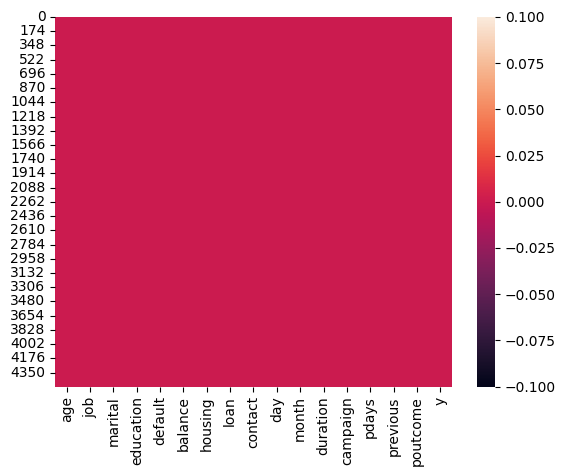

In [12]:
sns.heatmap(bank_copia.isnull())

<Axes: >

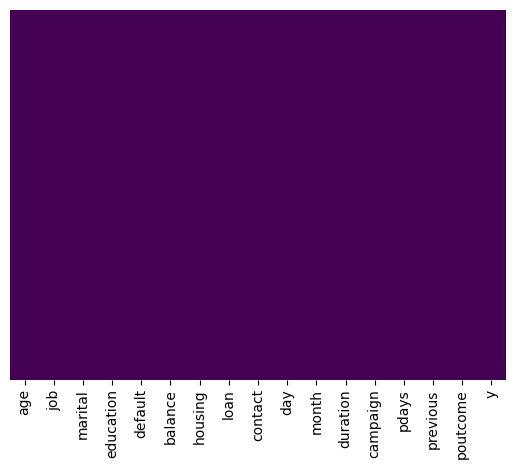

In [13]:
sns.heatmap(bank_copia.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
# Lista de variables binarias que necesitan conversión
variables_binarias = ['default', 'housing', 'loan', 'y']

# Diccionario de mapeo
mapeo_binario = {'yes': 1, 'no': 0} 

# Aplicar la conversión
for columna in variables_binarias:
    if columna in bank_copia.columns:
        bank_copia[columna] = bank_copia[columna].map(mapeo_binario)
        print(f" {columna} convertida a binaria numérica")

# Verificar
print("\n Distribución después de la conversión:")
for columna in variables_binarias:
    if columna in bank_copia.columns:
        print(f"{columna}: {bank_copia[columna].value_counts()}")

 default convertida a binaria numérica
 housing convertida a binaria numérica
 loan convertida a binaria numérica
 y convertida a binaria numérica

 Distribución después de la conversión:
default: default
0    4445
1      76
Name: count, dtype: int64
housing: housing
1    2559
0    1962
Name: count, dtype: int64
loan: loan
0    3830
1     691
Name: count, dtype: int64
y: y
0    4000
1     521
Name: count, dtype: int64


In [15]:
bank_copia.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0


In [16]:
bank_copia.nunique()

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

In [17]:
bank_copia.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [18]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


<Axes: xlabel='y', ylabel='count'>

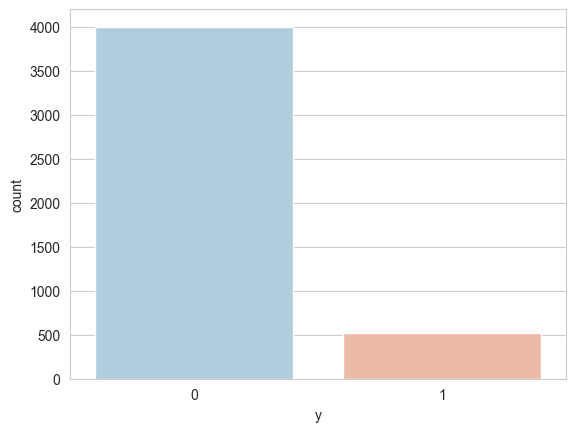

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='y',data=bank_copia,palette='RdBu_r')

In [20]:
#sns.set_style('whitegrid')
#sns.countplot(x='y',hue='Sex',data=bank_copia,palette='RdBu_r')

<Axes: xlabel='y', ylabel='age'>

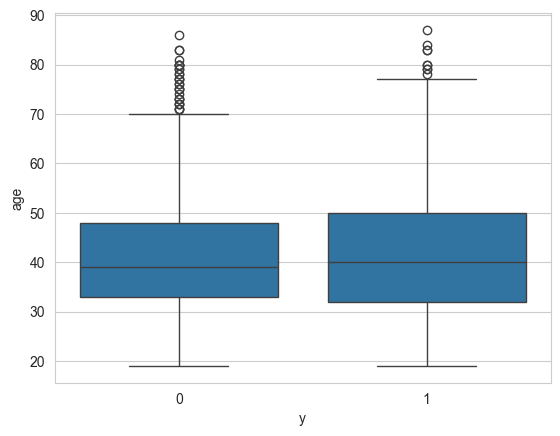

In [21]:
sns.boxplot(bank_copia,y=bank_copia.age,x=bank_copia.y)

<Axes: xlabel='y', ylabel='balance'>

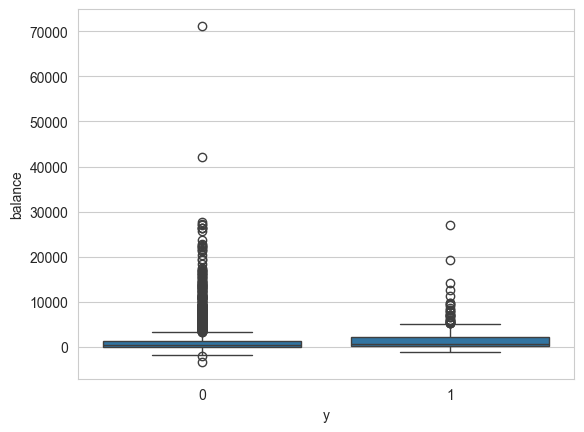

In [22]:
sns.boxplot(bank_copia,y=bank_copia.balance,x=bank_copia.y)

<Axes: xlabel='y', ylabel='duration'>

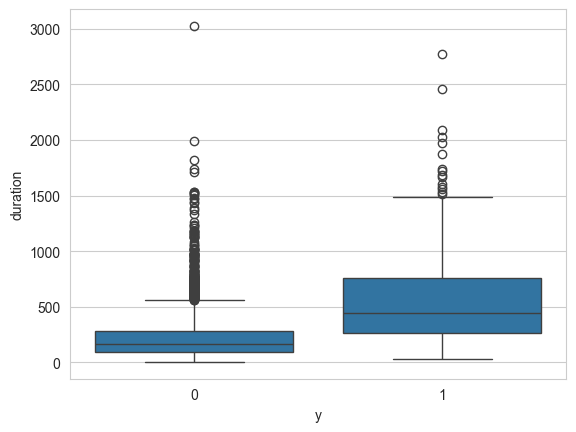

In [23]:
sns.boxplot(bank_copia,y=bank_copia.duration,x=bank_copia.y)

In [24]:
variables_binarias1=variables_binarias
variables_binarias1.remove('y')
variables_binarias1


['default', 'housing', 'loan']

In [25]:
data_pairplot=bank_copia.drop(columns=variables_binarias1)

In [26]:
data_pairplot

,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,1787,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,4789,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,1350,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,1476,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,unknown,5,may,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,-333,cellular,30,jul,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,-3313,unknown,9,may,153,1,-1,0,unknown,0
4518,57,technician,married,secondary,295,cellular,19,aug,151,11,-1,0,unknown,0
4519,28,blue-collar,married,secondary,1137,cellular,6,feb,129,4,211,3,other,0


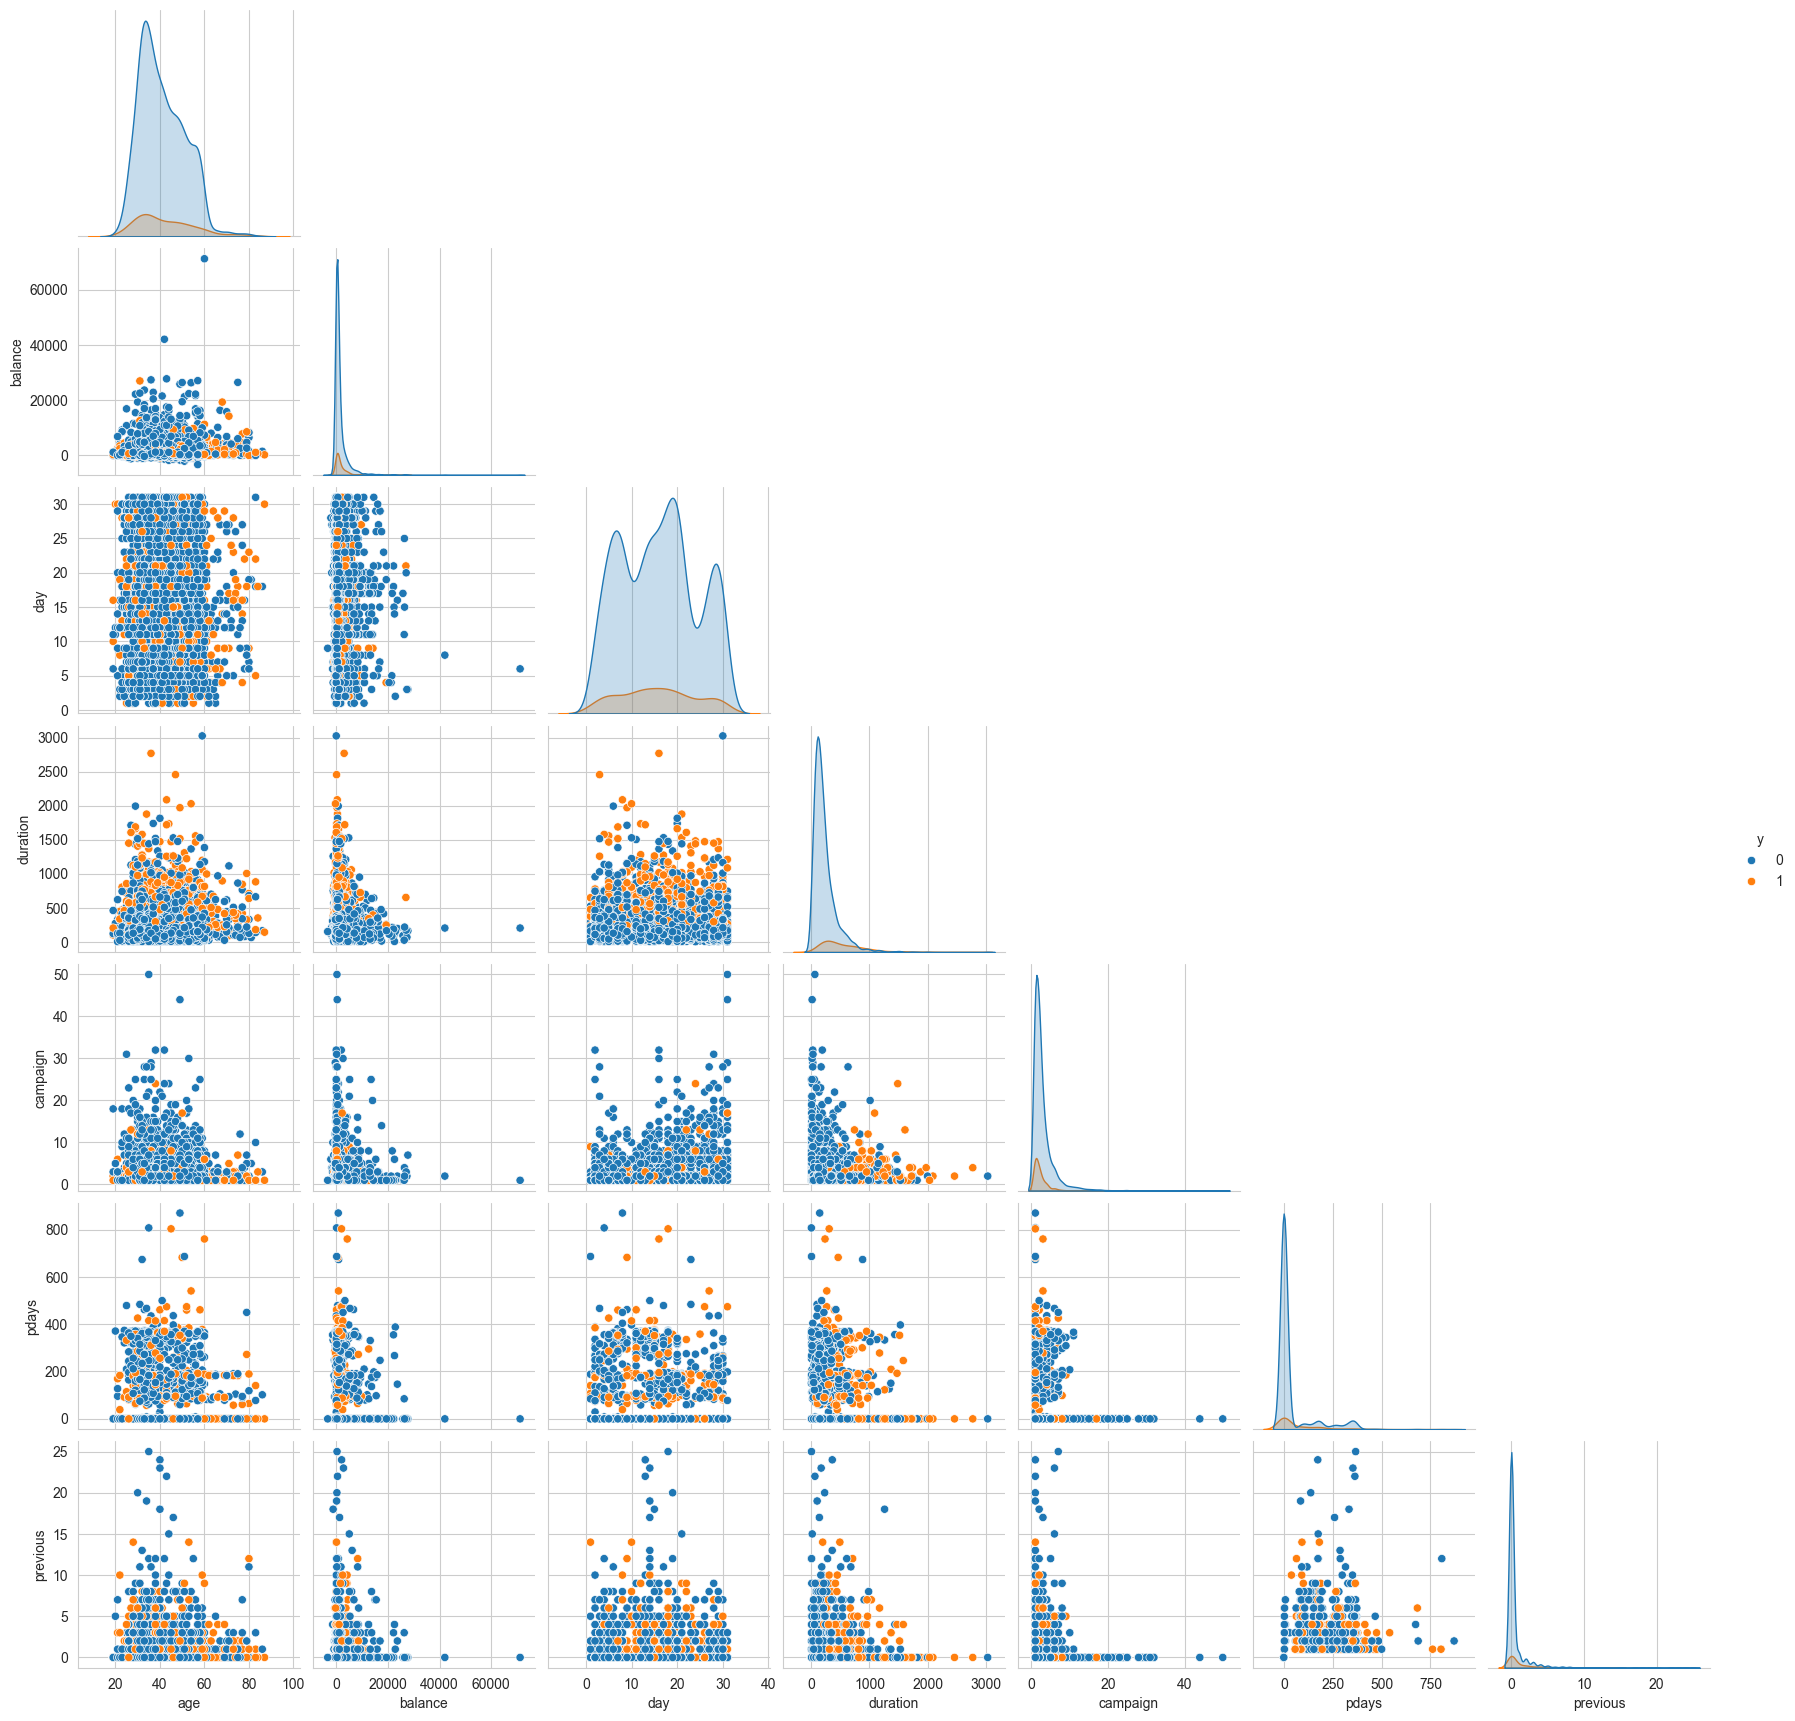

In [27]:
sns.pairplot(data_pairplot,hue='y',corner=True)
plt.show()

In [28]:
cualit = bank_copia.select_dtypes(include=['object']).columns.to_list()
cualit.extend(variables_binarias1)
cualit

['job',
 'marital',
 'education',
 'contact',
 'month',
 'poutcome',
 'default',
 'housing',
 'loan']

In [29]:
cuanti = bank_copia.select_dtypes(include=['number']).columns.to_list()
cuanti_filtrada=[x for x in cuanti if x not in variables_binarias1]
cuanti_filtrada

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']

In [30]:
correlacion=bank_copia[cuanti_filtrada].corr()['y'].sort_values()
correlacion

campaign   -0.061147
day        -0.011244
balance     0.017905
age         0.045092
pdays       0.104087
previous    0.116714
duration    0.401118
y           1.000000
Name: y, dtype: float64

In [31]:
variables_categoricas=['job','marital','education','default','housing','loan','contact','month','poutcome']

In [32]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    k = min(contingency_table.shape) - 1
    return np.sqrt(chi2 / (n * k))

def cramers_v_target(df, target_variable):
    # Inicializar un diccionario para almacenar los resultados
    cramers_v_results = {}


    # Iterar sobre cada columna categórica del DataFrame
    for column in variables_categoricas:
        if column != target_variable:  # Ignorar la variable objetivo
            # Calcular Cramér's V
            v = cramers_v(df[target_variable], df[column])
            # Almacenar el resultado
            cramers_v_results[column] = v

    # Convertir los resultados a un DataFrame
    cramers_v_df = pd.DataFrame(list(cramers_v_results.items()), columns=['Categorical Variable', "Cramér's V"])

    return cramers_v_df

In [33]:
tab_c = cramers_v_target(bank_copia, 'y')
tab_c

,Categorical Variable,Cramér's V
0,job,0.123529
1,marital,0.064879
2,education,0.058053
3,default,0.000000
4,housing,0.103985
5,loan,0.069554
6,contact,0.139413
7,month,0.235389
8,poutcome,0.292529


In [34]:
def barras(df_copia,x):
  print(f"--------------------------------------{x}---------------------------------------------")
  df_copia['codid']=range(1,len(df_copia)+1)
  fig, ax = plt.subplots(1,2,figsize=(8,4.5))
  tabla1 = df_copia.pivot_table(index=x,columns='y',values='codid',aggfunc='count')
  tabla2 = tabla1.div(tabla1.sum(axis=1), axis=0) * 100
  ax[0].set_title('Gráfico 1: Frecuencia de valores')
  tabla1.plot(kind='bar',stacked=True,ax=ax[0])
  ax[1].set_title('Gráfico 2: Porcentaje de filas')
  tabla2.plot(kind='bar',stacked=True,ax=ax[1])
  plt.show()

--------------------------------------job---------------------------------------------


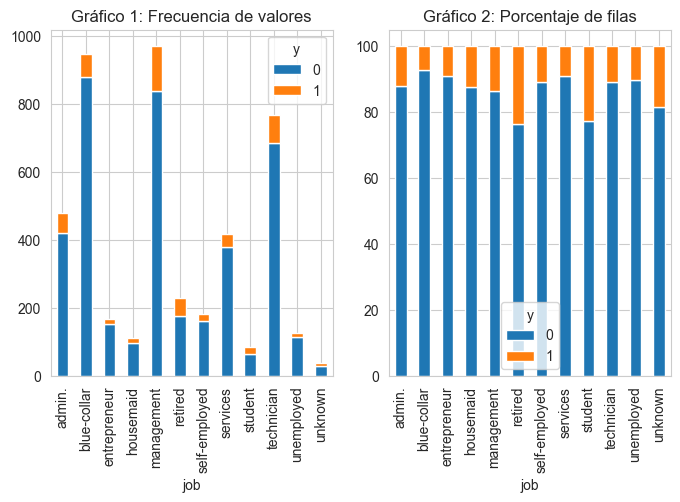

--------------------------------------marital---------------------------------------------


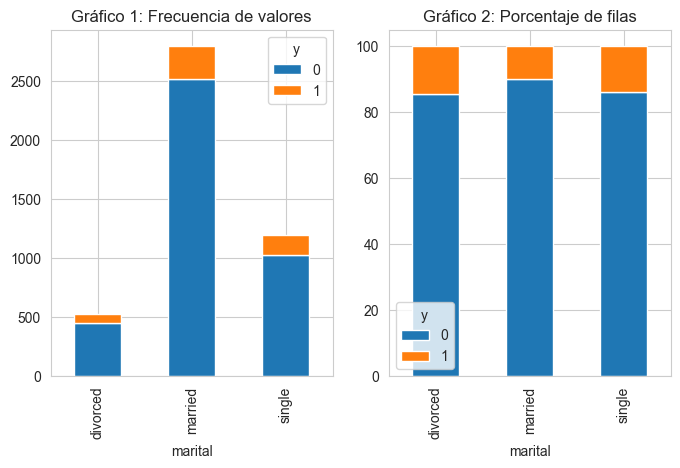

--------------------------------------education---------------------------------------------


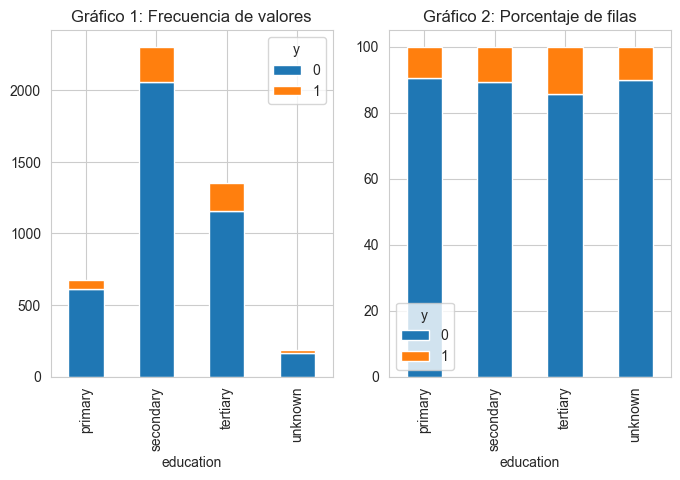

--------------------------------------contact---------------------------------------------


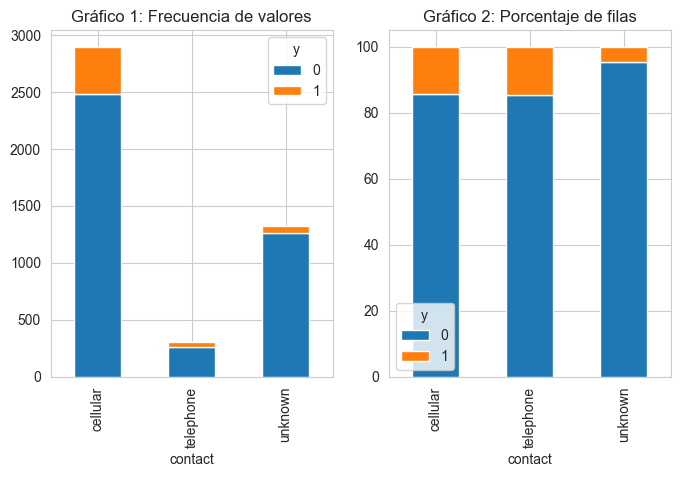

--------------------------------------month---------------------------------------------


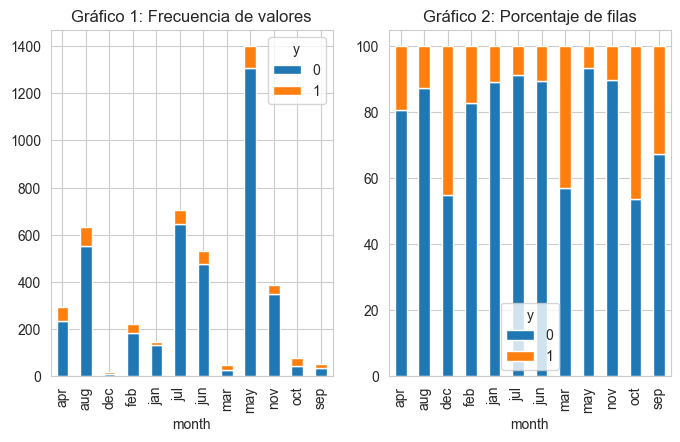

--------------------------------------poutcome---------------------------------------------


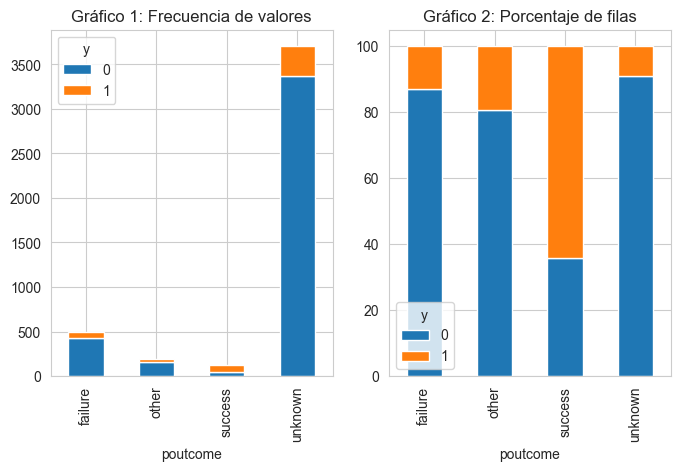

--------------------------------------default---------------------------------------------


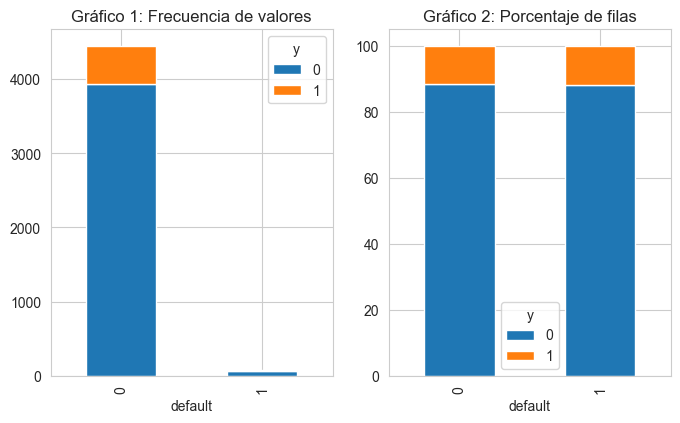

--------------------------------------housing---------------------------------------------


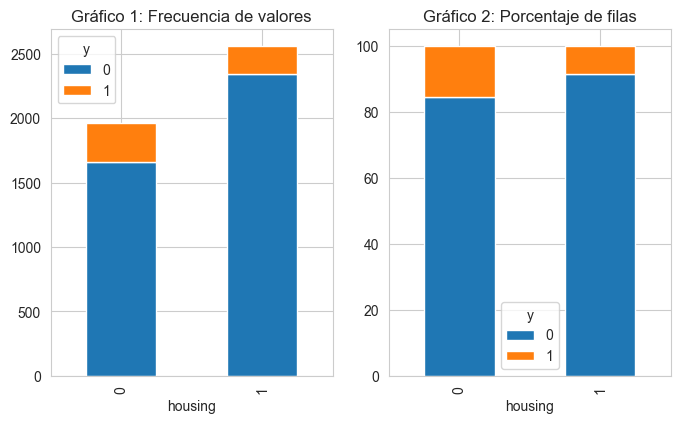

--------------------------------------loan---------------------------------------------


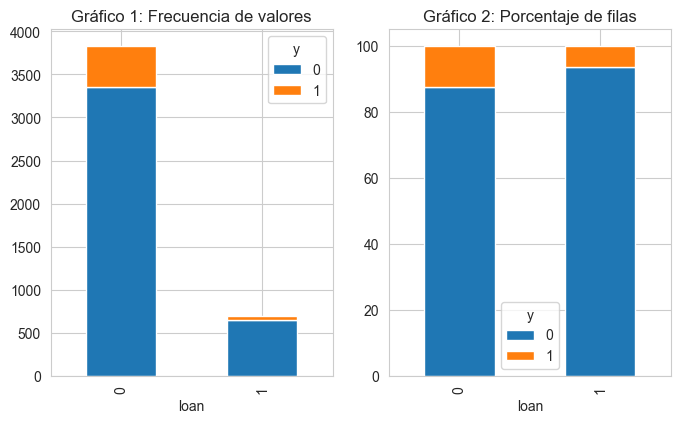

In [35]:
for x in cualit:
  barras(bank_copia,x)

In [36]:
bank_copia2=bank_copia.copy(deep=True)

In [37]:
# TRANSFORMACIÓN CORRECTA PARA TODOS LOS MODELOS
def categorizar_pdays(pdays):
    """
    Transformación inteligente de pdays que funciona para:
    - Regresión logística
    - Random Forest  
    - XGBoost
    - LightGBM
    """
    if pdays == -1:
        return 'nunca_contactado'
    elif pdays == 0:
        return 'contacto_hoy'
    elif pdays <= 7:
        return '1_7_dias'
    elif pdays <= 30:
        return '8_30_dias'
    elif pdays <= 90:
        return '31_90_dias'
    elif pdays <= 180:
        return '91_180_dias'
    else:
        return 'mas_180_dias'

# Aplicar la transformación
bank_copia2['pdays_categoria'] = bank_copia2['pdays'].apply(categorizar_pdays)

In [38]:
bank_copia2['job']=bank_copia2['job'].replace({'unknown':'unknown_job'})
bank_copia2['marital']=bank_copia2['marital'].replace({'unknown':'unknown_marital'})
bank_copia2['education']=bank_copia2['education'].replace({'unknown':'unknown_education'})
bank_copia2['contact']=bank_copia2['contact'].replace({'unknown':'unknown_contact'})
bank_copia2['poutcome']=bank_copia2['poutcome'].replace({'unknown':'unknown_poutcome'})


In [39]:
bank_copia2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,codid,pdays_categoria
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown_poutcome,0,1,nunca_contactado
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0,2,mas_180_dias
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0,3,mas_180_dias
3,30,management,married,tertiary,0,1476,1,1,unknown_contact,3,jun,199,4,-1,0,unknown_poutcome,0,4,nunca_contactado
4,59,blue-collar,married,secondary,0,0,1,0,unknown_contact,5,may,226,1,-1,0,unknown_poutcome,0,5,nunca_contactado


In [40]:
jobs = pd.get_dummies(bank_copia2['job'],drop_first=True,dtype=int)
maritals = pd.get_dummies(bank_copia2['marital'],drop_first=True,dtype=int)
education=pd.get_dummies(bank_copia2['education'],drop_first=True,dtype=int)
contact=pd.get_dummies(bank_copia2['contact'],drop_first=True,dtype=int)
poutcome=pd.get_dummies(bank_copia2['poutcome'],drop_first=True,dtype=int)
pdays_cat=pd.get_dummies(bank_copia2['pdays_categoria'],drop_first=True,dtype=int)
month=pd.get_dummies(bank_copia2['month'],drop_first=True,dtype=int)

In [41]:
bank_copia2.drop(['job','marital','education','contact','poutcome','pdays_categoria','pdays','month','codid'],axis=1,inplace=True)

In [42]:
bank_copia2=pd.concat([bank_copia2,jobs,maritals,education,contact,poutcome,pdays_cat,month],axis=1)

In [43]:
bank_copia2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                4521 non-null   int64
 1   default            4521 non-null   int64
 2   balance            4521 non-null   int64
 3   housing            4521 non-null   int64
 4   loan               4521 non-null   int64
 5   day                4521 non-null   int64
 6   duration           4521 non-null   int64
 7   campaign           4521 non-null   int64
 8   previous           4521 non-null   int64
 9   y                  4521 non-null   int64
 10  blue-collar        4521 non-null   int64
 11  entrepreneur       4521 non-null   int64
 12  housemaid          4521 non-null   int64
 13  management         4521 non-null   int64
 14  retired            4521 non-null   int64
 15  self-employed      4521 non-null   int64
 16  services           4521 non-null   int64
 17  student       

In [44]:
bank_copia2.head()

,age,default,balance,housing,loan,day,duration,campaign,previous,y,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,30,0,1787,0,0,19,79,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,33,0,4789,1,1,11,220,1,4,0,...,0,0,0,0,0,0,1,0,0,0
2,35,0,1350,1,0,16,185,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,30,0,1476,1,1,3,199,4,0,0,...,0,0,0,0,1,0,0,0,0,0
4,59,0,0,1,0,5,226,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [45]:
target = 'y'
cols = [x for x in bank_copia2.columns if x not in [target]]

In [46]:
#Modelo de regresión binaria con enlace logístico
# Prepare the data
X,y = bank_copia2[cols],bank_copia2[["y"]]
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2, random_state=1,stratify=y)

In [47]:
# Initialize and fit the model
model1 = LGBMClassifier() 
model1.fit(X_train, y_train)

# Separate the features and the target variable
predict_train_lg = model1.predict_proba(X_train)[:,1]
predict_test_lg = model1.predict_proba(X_test)[:,1]


# Print scores on both
print("auc on training in LGBMClassifier data : {:.3f}".format(roc_auc_score(y_train, predict_train_lg)))
print("auc on testing in LGBMClassifier  data : {:.3f}".format(roc_auc_score(y_test, predict_test_lg))) 

[LightGBM] [Info] Number of positive: 417, number of negative: 3199
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 722
[LightGBM] [Info] Number of data points in the train set: 3616, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.115321 -> initscore=-2.037507
[LightGBM] [Info] Start training from score -2.037507
auc on training in LGBMClassifier data : 1.000
auc on testing in LGBMClassifier  data : 0.887


In [48]:
# Initialize and fit the model
model2 = XGBClassifier() 
model2.fit(X_train, y_train)

# Separate the features and the target variable
predict_train_lg = model2.predict_proba(X_train)[:,1]
predict_test_lg = model2.predict_proba(X_test)[:,1]


# Print scores on both
print("auc on training in XGBClassifier data : {:.3f}".format(roc_auc_score(y_train, predict_train_lg)))
print("auc on testing in XGBClassifier  data : {:.3f}".format(roc_auc_score(y_test, predict_test_lg))) 

auc on training in XGBClassifier data : 1.000
auc on testing in XGBClassifier  data : 0.887


In [49]:
# Initialize and fit the model
model3 = CatBoostClassifier(verbose=0, n_estimators=500) 
model3.fit(X_train, y_train)

# Separate the features and the target variable
predict_train_lg = model3.predict_proba(X_train)[:,1]
predict_test_lg = model3.predict_proba(X_test)[:,1]


# Print scores on both
print("auc on training in CatBoostClassifier data : {:.3f}".format(roc_auc_score(y_train, predict_train_lg)))
print("auc on testing in CatBoostClassifier  data : {:.3f}".format(roc_auc_score(y_test, predict_test_lg))) 

auc on training in CatBoostClassifier data : 0.988
auc on testing in CatBoostClassifier  data : 0.898


In [50]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=None, splitter='best')
dtree.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [51]:
# Separate the features and the target variable
predict_train_dtree = dtree.predict_proba(X_train)[:,1]
predict_test_dtree = dtree.predict_proba(X_test)[:,1]


# Print scores on both
print("auc on training in dtree data : {:.3f}".format(roc_auc_score(y_train, predict_train_dtree)))
print("auc on testing in dtree  data : {:.3f}".format(roc_auc_score(y_test, predict_test_dtree)))

auc on training in dtree data : 1.000
auc on testing in dtree  data : 0.658


In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
rfc.fit(X_train, y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [53]:
# Separate the features and the target variable
predict_train_rfc = rfc.predict_proba(X_train)[:,1]
predict_test_rfc = rfc.predict_proba(X_test)[:,1]


# Print scores on both
print("auc on training in rfc data : {:.3f}".format(roc_auc_score(y_train, predict_train_rfc)))
print("auc on testing in rfc  data : {:.3f}".format(roc_auc_score(y_test, predict_test_rfc)))

auc on training in rfc data : 0.999
auc on testing in rfc  data : 0.855


In [54]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


In [55]:
# Separate the features and the target variable
predict_train_model = model.predict_proba(X_train)[:,1]
predict_test_model = model.predict_proba(X_test)[:,1]


# Print scores on both
print("auc on training in lrc data : {:.3f}".format(roc_auc_score(y_train, predict_train_model)))
print("auc on testing in lrc  data : {:.3f}".format(roc_auc_score(y_test, predict_test_model)))

auc on training in lrc data : 0.907
auc on testing in lrc  data : 0.884


In [56]:
from sklearn.linear_model import LogisticRegression
logmodel1 = LogisticRegression(C=1.0, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
logmodel1.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'auto'


In [57]:
# Separate the features and the target variable
predict_train_logmodel1 = logmodel1.predict_proba(X_train)[:,1]
predict_test_logmodel1 = logmodel1.predict_proba(X_test)[:,1]


# Print scores on both
print("auc on training in logmodel1 data : {:.3f}".format(roc_auc_score(y_train, predict_train_logmodel1)))
print("auc on testing in logmodel1  data : {:.3f}".format(roc_auc_score(y_test, predict_test_logmodel1)))

auc on training in logmodel1 data : 0.909
auc on testing in logmodel1  data : 0.877


In [58]:
resultados = []

modelos = {
    "LGBM": model1,
    "XGB": model2,
    "CatBoost": model3,
    "DecisionTree": dtree,
    "RandomForest": rfc,
    "LogReg": model,
    "LogReg_Balanced": logmodel1
}

for nombre, modelo in modelos.items():
    y_train_pred = modelo.predict_proba(X_train)[:,1]
    y_test_pred  = modelo.predict_proba(X_test)[:,1]
    resultados.append({
        "Modelo": nombre,
        "AUC Train": roc_auc_score(y_train, y_train_pred),
        "AUC Test":  roc_auc_score(y_test, y_test_pred)
    })

df_resultados = pd.DataFrame(resultados)
print(df_resultados.sort_values("AUC Test", ascending=False))


            Modelo  AUC Train  AUC Test
2         CatBoost   0.988222  0.898432
0             LGBM   0.999880  0.887232
1              XGB   1.000000  0.886920
5           LogReg   0.906691  0.883979
6  LogReg_Balanced   0.908721  0.876825
4     RandomForest   0.999357  0.855211
3     DecisionTree   1.000000  0.657790


           Variable  Coeficiente  Abs_Coef
28          success     2.125851  2.125851
26  unknown_contact    -1.440109  1.440109
41              mar     1.142676  1.142676
44              oct     1.073006  1.073006
38              jan    -0.885115  0.885115
43              nov    -0.811364  0.811364
39              jul    -0.793167  0.793167
45              sep     0.759924  0.759924
4              loan    -0.690239  0.690239
11        housemaid    -0.624755  0.624755
42              may    -0.550505  0.550505
40              jun     0.540890  0.540890
18       unemployed    -0.509206  0.509206
9       blue-collar    -0.506095  0.506095
1           default     0.491714  0.491714


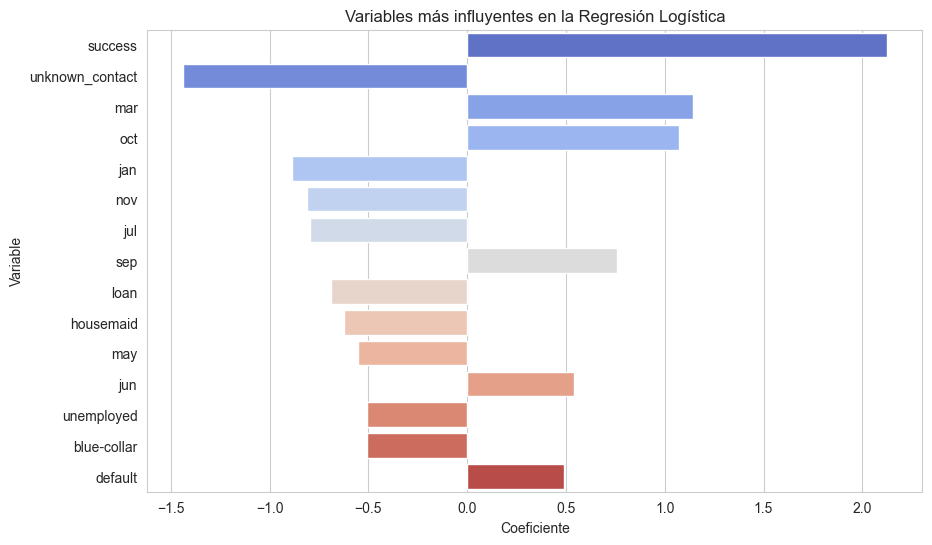

In [59]:
# Importancia de variables en la regresión logística
betas = pd.DataFrame({
    "Variable": X_train.columns,
    "Coeficiente": model.coef_[0]
})

# Ordenamos de mayor a menor influencia
betas["Abs_Coef"] = betas["Coeficiente"].abs()
betas = betas.sort_values("Abs_Coef", ascending=False)

print(betas.head(15))  # top 15 más influyentes

# Gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x="Coeficiente", y="Variable", data=betas.head(15), palette="coolwarm")
plt.title("Variables más influyentes en la Regresión Logística")
plt.show()


## 📈 Resultados

|Modelo           |  AUC Train      |AUC Test   |  
|-----------------|-----------------|-----------|
|    CatBoost     |  0.988222       |0.898432   |
|        LGBM     |  0.999880       |0.887232   |
|      LogReg     |  0.906691       |0.883979   |
|         XGB     |  1.000000       |0.886920   |
|LogReg_Balanced  |  0.908721       |0.876825   |
|RandomForest     |  0.999548       |0.830920   |
|DecisionTree     |  1.000000       |0.677020   |

## 📊 Interpretación de coeficientes de la Regresión Logística  

Además de comparar métricas de desempeño, la regresión logística permite interpretar qué variables influyen más en la decisión de los clientes.  

En el análisis de coeficientes, se observa lo siguiente:  

- **Coeficiente positivo (+):** Aumenta la probabilidad de suscripción respecto a la base.  
- **Coeficiente negativo (–):** Disminuye la probabilidad de suscripción respecto a la base.  
- **Valor absoluto:** Mide la fuerza de la asociación (mientras más alto, más fuerte es el efecto).  

## Resultados relevantes del modelo
- **`poutcome_success (2.13)`** → Los clientes que tuvieron un **contacto previo exitoso** tienen una probabilidad **mucho mayor** de suscribirse, comparados con la base (`failure`).
- **`unknown_contact (-1.44)`** → Cuando el medio de contacto es `unknown`, la probabilidad de suscripción **disminuye significativamente** frente al contacto por celular (categoría base).
- **Meses de contacto:**  
  - `mar (1.14)` y `oct (1.07)` → Los clientes contactados en **marzo u octubre** muestran más probabilidad de suscribirse en comparación con el mes base (abril).  
  - `jan (-0.89)` y `nov (-0.81)` → Los clientes contactados en **enero o noviembre** tienen menos probabilidad de suscripción frente a abril.
- **`loan (-0.69)`** → Los clientes con un préstamo personal tienen menos probabilidad de suscribirse que los que no lo tienen (categoría base).  
- **`housemaid (-0.62)` y `unemployed (-0.51)`** → Estos grupos ocupacionales presentan **menor probabilidad** de suscripción frente a la categoría base (`job=admin.`).  
- **`default (0.49)`** → Curiosamente, los clientes con historial de crédito en default muestran una ligera mayor probabilidad de suscribirse frente a los que no lo tienen, aunque este efecto debe tomarse con cautela.

 


**Conclusión**:  
- **CatBoost** obtuvo el mejor AUC en datos de prueba (~0.90).  
- Algunos modelos presentan **sobreajuste** (AUC muy alto en entrenamiento y menor en test, como DecisionTree o RandomForest).  
- La regresión logística, aunque más simple, mantiene un desempeño competitivo y además permite interpretar coeficientes.  